In [68]:
import numpy as np 
import cv2 as cv2
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

In [69]:
data = 'data/'
annotations = 'data/annotation/'

In [70]:
def get_all_file_names(folder):
    return os.listdir(data+folder)

In [82]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread(data +"train_1/"+"1909003307_1"+".jpg")
x,y,z = (img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(x//8, y//8))
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
def create_test_triplets():
    
    
    triplets = []
    
    files = get_all_file_names("train_1")
    R = 20
    
    
    for f in files:
        I_path     = f.replace('.jpg', '')
    
        I = cv.imread(data +"train_1/"+I_path+".jpg")
        
        return face_detection(I)
        
        S_true_x, S_true_y     = get_landmark_coords_from_file(I_path)
    
        np.random.shuffle(files)
        delta_files = files[:R]
        if I_path in delta_files:
            delta_files = delta_files.remove(I_path)
            delta_files.append(files[20])
    
        for d in delta_files:
            S_hat = d.replace(".jpg", '')
            S_hat_x, S_hat_y       = get_landmark_coords_from_file(S_hat)
            S_delta_x              = S_true_x - S_hat_x
            S_delta_y              = S_true_y - S_hat_y
            S_hat                  = np.array(list(zip(S_hat_x, S_hat_y)))
            S_delta                = np.array(list(zip(S_delta_x, S_delta_y)))
        
            triplets.append((I, S_hat, S_delta))
    
    return np.array(triplets)
    
    

In [60]:
def face_detection(image):
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml') 
    detected_faces = face_cascade.detectMultiScale(grayscale_image, 1.3, 5)
    for (column, row, width, height) in detected_faces:
          cv.rectangle(image,(column, row),(column + width, row + height),(0, 255, 0),4)    
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)


In [61]:
img = create_test_triplets()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def read_landmarks_from_file(file):
    landmarks_x = []
    landmarks_y= []
    f = open(file,"r")
    lines = f.readlines()
    for l in lines[1:]:
        coords = l.replace('\n', '').split(", ")
        landmarks_x.append(float(coords[0]))
        landmarks_y.append(float(coords[1])) 
    return (np.array(landmarks_x, dtype=float), np.array(landmarks_y, dtype=float))

In [ ]:
def get_landmark_coords_from_file(id_image):
    for i in range(1,2331, 1):
        with open(annotations+str(i)+".txt") as f:
            first_line = f.readline().replace('\n','')
            if (first_line == id_image):
                return read_landmarks_from_file(annotations+str(i)+".txt") 
    return None

In [ ]:
def plot_image_with_landmarks(id_image):
    img = cv.imread(data +"train_1/"+id_image)
    x,y = get_landmark_coords_from_file(id_image)
    plt.imshow(img)
    plt.plot(x,y, color='yellow', marker='o',  markersize=1,  linestyle = 'None')

TypeError: Image data of dtype object cannot be converted to float

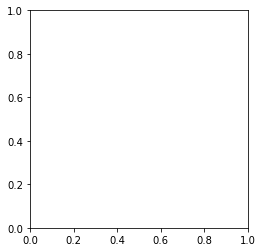

In [ ]:
plot_image_with_landmarks("10697993_1")
plot_image_with_landmarks("1629243_1")


In [ ]:
def compute_mean_shape(images):
    result = np.zeros((194,2))
    for i in images:
        x,y = get_landmark_coords_from_file(i)
        val = np.array(list(zip(x,y)))
        result = result + val
    return result / len(images)
        
        

In [ ]:
def learn_regressor():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-53-6d2d555683c0>, line 2)